##### Using sklearn iris dataset

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# Creating a DF , datasets is in data , columns are in feature_names

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# one more target column we have so we append it

df['target'] = iris.target            # target has: 0,1,2  for target_names
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris.target_names       # target : 0,1,2

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df[df.target==1].head()        # 0 shows for setosa , 1 shows for versicolor , 2 shows for virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [16]:
# Here we create a column from another column, in pandas we use- apply() method
# lambda() is a small func. for transformation that can apply on target column to generate new column - flower_name.

df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [15]:
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
# Cretaing 3 separate DF for 3  different species

df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [19]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


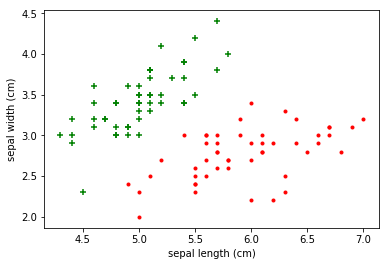

In [21]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='red',marker='.')

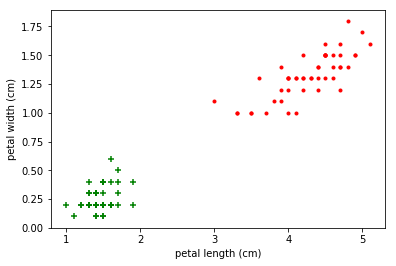

In [22]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red',marker='.')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# for train test data

x = df.drop(['target','flower_name'], axis='columns')
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
y = df.target

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [30]:
len(x_train)

120

In [31]:
from sklearn.svm import SVC                # classifier is SVC

model = SVC()

In [36]:
model.fit(x_train,y_train)        # use all these SVC parameters in above model=SVC(C=10)   , by pressing: shift+tab

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [37]:
model.score(x_test,y_test)

1.0

## -----------------------------------------------------------------------------

## Case 2

#### taking 'Social Network Ads' dataset check whether the customer 'purchase' product based on 'salary' or 'age'

In [3]:
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [4]:
dataset = pd.read_csv('Social_Network_Ads.csv') 
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
X = dataset.iloc[:,[2,3]].values    # 2:4 same # independent feature (Age, Estimated Salary)
y = dataset.iloc[:,4].values    # dependent feature (Purchased)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [8]:
from sklearn.preprocessing import StandardScaler          # Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.svm import SVC               # creating model

classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
y_pred = classifier.predict(X_test)          # predicting

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score          # comparing predicted value with actual 

cm = confusion_matrix(y_test, y_pred)      # y_test : actual value ,  y_pred : predicted value
acc = accuracy_score(y_test, y_pred)

print('Confusion matrix : \n', cm)
print(f'Accuracy is : {acc:0.1%}')

Confusion matrix : 
 [[66  2]
 [ 8 24]]
Accuracy is : 90.0%


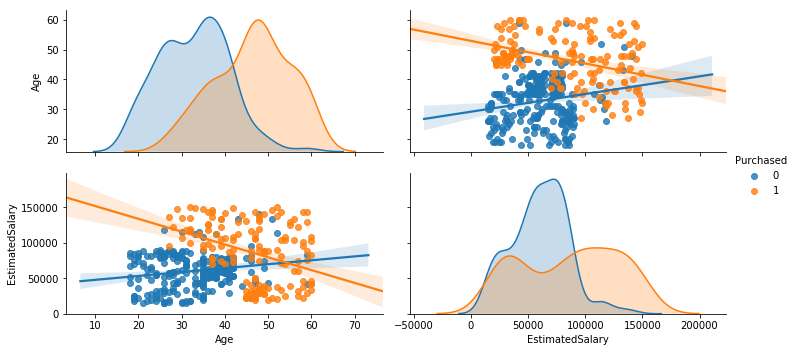

In [17]:
import seaborn as sns

sns.pairplot(dataset, hue='Purchased', vars=['Age','EstimatedSalary'],aspect=2, kind='reg')
# sns.pairplot(dataset, hue='Purchased')